# Project 3

### Business Problem
The St. Joseph public health department/clinic wants to help improve the overall health of the county's residents. Through the progression of pandemic, people's lifestyles have changed drastically with a general decrease in overall physical activity. On a national level, number of people with depression have increased as well. Many studies have shown that there is a high correlation between physical activity/health and mental health; because of this the county's health officials are 

Veggies: 1: Never, 2: Sometimes, 3: Always<br>
H2O: 1: Less than 1L, 2: Less than 2L, 3: More than 2L<br>
Physical Activity: 0: None, 1: 1-2 days, 2: 2-4 days, 3: 4-5 days<br>
Time on Devices: 0: None, 1: 2 hrs or less, 2: 3-5 hrs, 3: 5+hrs<br>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

from sklearn import metrics
from sklearn import tree, svm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.svm import SVC

from scipy.spatial.distance import euclidean
from scipy import stats

pd.set_option('display.max_columns', None)

In [38]:
obesity=pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv', header=0)
obesity.head()

,Gender,Age,Height,Weight,Family_Obesity_History,Frequent_HighCalorie_Food,Veggies,Num_of_Meals,Food_btw_Meals,Smoke,H2O,Calorie_Monitor,Physical_Activity,Time_On_Devices,Alcohol_Consump,Transportation,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [39]:
print(len(obesity))
obesity.isna().sum()

2111


Gender                       0
Age                          0
Height                       0
Weight                       0
Family_Obesity_History       0
Frequent_HighCalorie_Food    0
Veggies                      0
Num_of_Meals                 0
Food_btw_Meals               0
Smoke                        0
H2O                          0
Calorie_Monitor              0
Physical_Activity            0
Time_On_Devices              0
Alcohol_Consump              0
Transportation               0
Obesity_Level                0
dtype: int64

In [40]:
obesity.nunique()

Gender                          2
Age                          1402
Height                       1574
Weight                       1525
Family_Obesity_History          2
Frequent_HighCalorie_Food       2
Veggies                       810
Num_of_Meals                  635
Food_btw_Meals                  4
Smoke                           2
H2O                          1268
Calorie_Monitor                 2
Physical_Activity            1190
Time_On_Devices              1129
Alcohol_Consump                 4
Transportation                  5
Obesity_Level                   7
dtype: int64

In [41]:
obesity['Age']=obesity['Age'].astype('float')

In [42]:
# obesity_2=pd.DataFrame(data=obesity, columns=['Age','Height','Weight'])

In [43]:
obesity.head()

,Gender,Age,Height,Weight,Family_Obesity_History,Frequent_HighCalorie_Food,Veggies,Num_of_Meals,Food_btw_Meals,Smoke,H2O,Calorie_Monitor,Physical_Activity,Time_On_Devices,Alcohol_Consump,Transportation,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [44]:
# Here I am dropping a single row that had an 'Always' on Alcohol_Consump because there was only 1
# person from the entire data. This later threw off X_train and X_test because there was only 1 person
# that always drank alcohol; therefore, could not compare the two splits
obesity.loc[obesity['Alcohol_Consump']=="Always"]
obesity=obesity.drop(labels=26)

In [45]:
# while it is a better practice to adjust the data after train test split, I am only rounding these numerical values
# because 1. it only changes the values to a whole number or other integers that fit the data description
# 2. because it would be the same if the data were changed after train test splitting, but would just be additional
# lines of unneccessary code
obesity['Age']=round(obesity['Age'],1)
obesity['Height']=round(obesity['Height'],2)
obesity['Weight']=round(obesity['Weight'],1)
obesity['Veggies']=round(obesity['Veggies'],0)
obesity['Num_of_Meals']=round(obesity['Num_of_Meals'],0)
obesity['H2O']=round(obesity['H2O'],0)
obesity['Physical_Activity']=round(obesity['Physical_Activity'],0)
obesity['Time_On_Devices']=round(obesity['Time_On_Devices'],0)

gender age  height  weight  fam history  highcalfood veggies numMeals btwMeals  smoke  h20  calorieMon  active  phoneTime Alc Transportation<br><br>
gender, fam history, high calory, veggies, num meals, h2o, phys activ, time on device are all categorical

In [46]:
# df = pd.concat([df,pd.get_dummies(df['mycol'], prefix='mycol',dummy_na=True)],axis=1).drop(['mycol'],axis=1)

In [47]:
#Train test split
# X=obesity.drop(columns=['Age Group','Obesity_Level'])
X=obesity.drop(columns=['Obesity_Level'])
y=obesity['Obesity_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [48]:
# One hot encoder
# instead of using the actual one hot encoder, I've decided to use get_dummies because three of the columns are not categorical
X_train_ohe =pd.get_dummies(X_train, columns= ['Gender', 'Family_Obesity_History','Frequent_HighCalorie_Food','Veggies','Num_of_Meals',
                        'Food_btw_Meals','Smoke','H2O','Calorie_Monitor','Physical_Activity','Time_On_Devices',
                        'Alcohol_Consump','Transportation'], drop_first=True)
X_test_ohe = pd.get_dummies(X_test, columns= ['Gender', 'Family_Obesity_History','Frequent_HighCalorie_Food','Veggies','Num_of_Meals',
                        'Food_btw_Meals','Smoke','H2O','Calorie_Monitor','Physical_Activity','Time_On_Devices',
                        'Alcohol_Consump','Transportation'], drop_first=True)
# print(X_test_ohe.columns)
# print(X_train_ohe.columns)

In [49]:
#Label Encoder for y. Fit transforming so that it is in array form
le=LabelEncoder()
y_train_le =le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)


In [51]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train_ohe, y_train_le)

DecisionTreeClassifier(criterion='entropy')

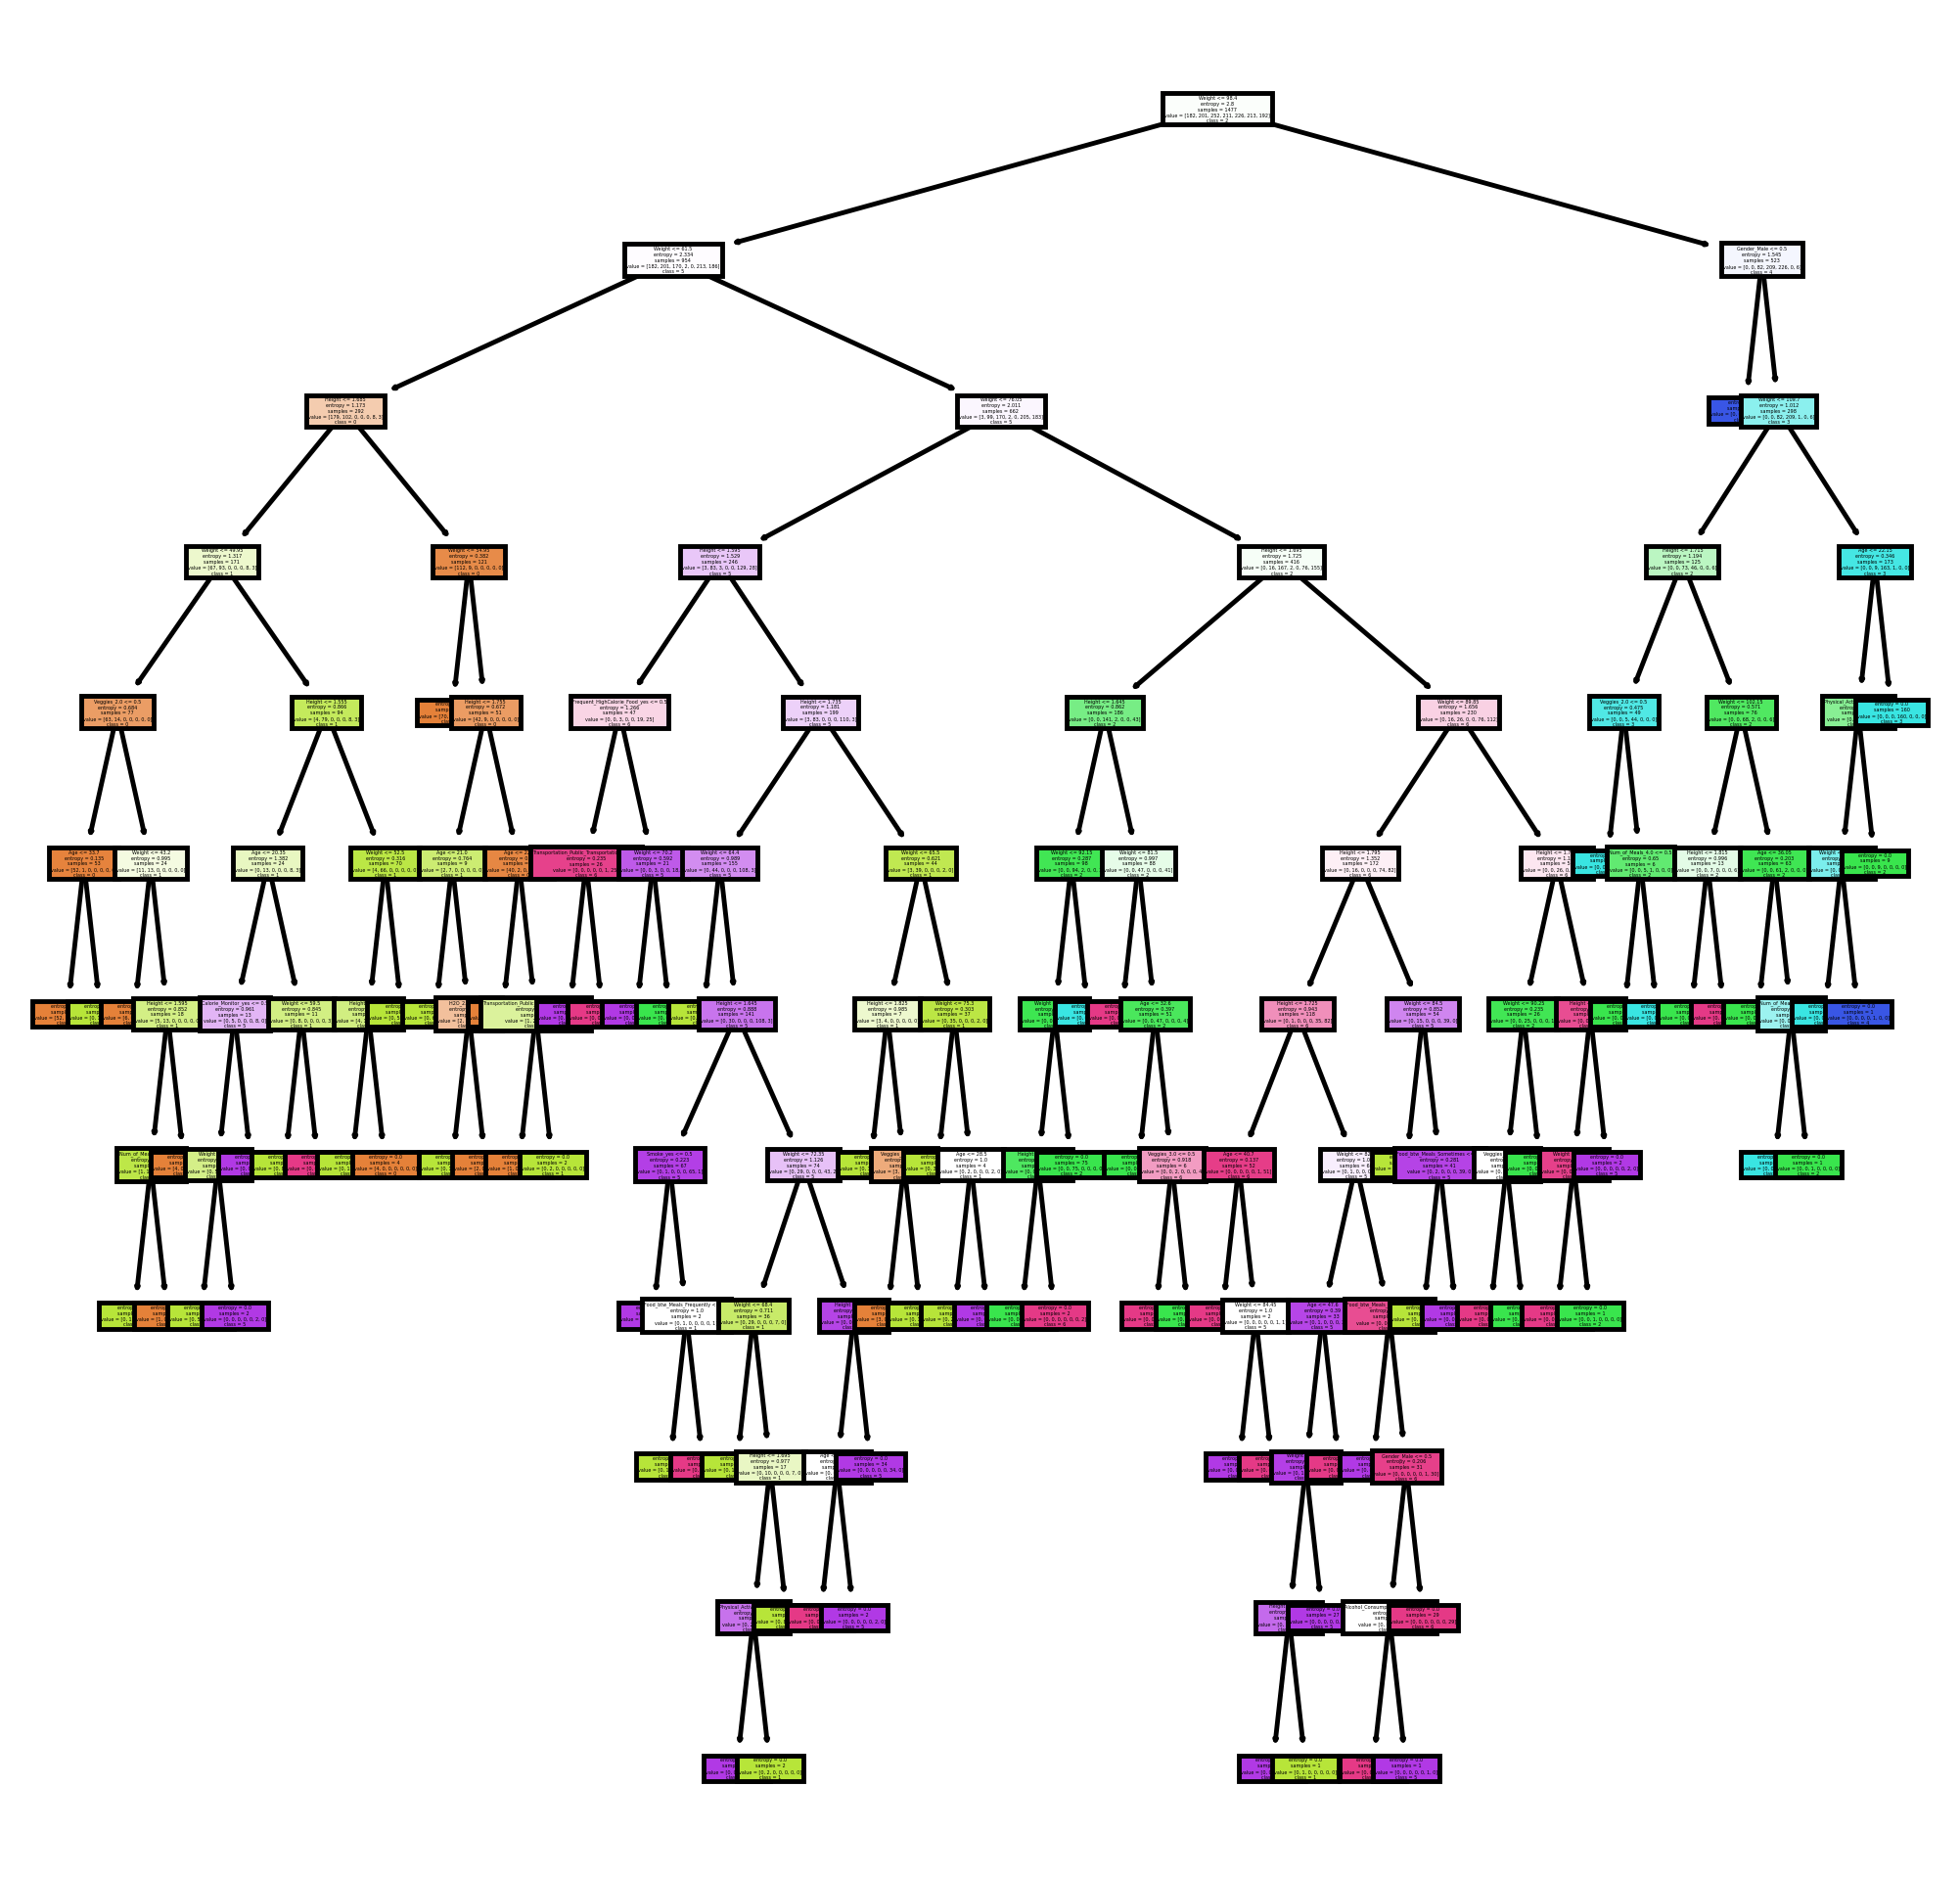

In [52]:
fig=plt.subplots(nrows=1, ncols=1, figsize=(7, 7), dpi=350)
tree_plot=tree.plot_tree(dtree, feature_names=X_train_ohe.columns, class_names=np.unique(y_train_le).astype('str'), filled=True)
plt.show()

In [53]:
#Standard Scaler
scaler=StandardScaler()
cols=['Age','Weight','Height']
# columns that need to be scaled are labeled so that categorical data isn't scaled as well
for i in cols:
    scale = scaler.fit(X_train_ohe[[i]])
    # transform the training data columns
    X_train_ohe[i] = scale.fit_transform(X_train_ohe[[i]])
    # transform the testing data columns
    X_test_ohe[i] = scale.transform(X_test_ohe[[i]])

# X_train_scaled=scaler.fit_transform(X_train_ohe[['Age','Height','Weight']])
# X_train_scaled=np.concatenate(X_train_scaled, X_train_ohe.drop(columns=['Age','Height','Weight']).astype('str'))
# X_train_scaled= X_train_scaled.concatnate(X_train_ohe.drop(columns=['Age','Height','Weight']))
# X_test_scaled=scaler.transform(X_test_ohe[['Age','Height','Weight']])
# X_test_scaled=np.concatenate(X_test_scaled, X_test_scaled.drop(columns=['Age','Height','Weight']).astype('str'))
# X_test_scaled= X_test_scaled.concatnate(X_test_ohe.drop(columns=['Age','Height','Weight']))



In [54]:
# K Nearest Neighbors
knn=KNeighborsClassifier()
knn.fit(X_train_ohe, y_train_le)
pred= knn.predict(X_test_ohe)
# instead of finding out the individual scores, I used the classification report from the metrics
# to find all scores
print(metrics.classification_report(y_test_le, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        90
           1       0.63      0.47      0.54        85
           2       0.79      0.90      0.84        99
           3       0.87      0.95      0.91        86
           4       0.99      1.00      0.99        98
           5       0.69      0.70      0.70        77
           6       0.82      0.73      0.77        98

    accuracy                           0.81       633
   macro avg       0.80      0.81      0.80       633
weighted avg       0.81      0.81      0.81       633



In [55]:
# Because y columns were label encoded, this is to show which number corresponds to
# individual obesity levels
list(le.inverse_transform([0, 1, 2, 3, 4, 5, 6]))

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [77]:
# trying to see how many each y category has
# y.value_counts()
# train_count=np.bincount(y_train_le)
# ii = np.nonzero(train_count)[0]
# np.vstack((ii,train_count[ii])).T

In [56]:
# normalization
X_train_norm= X_train_ohe.copy()
X_test_norm = X_test_ohe.copy()

for i in X_train_norm.columns:
    X_train_norm[i] = (X_train_norm[i] - min(X_train_norm[i]))/ (max(X_train_norm[i]) - min(X_train_norm[i]))
    X_test_norm[i] = (X_test_norm[i] - min(X_test_norm[i]))/ (max(X_test_norm[i]) - min(X_test_norm[i]))


In [65]:
# logistic regression
log = LogisticRegression(C=1e9, solver='saga')
log_model=log.fit(X_train_norm, y_train_le)
log_model

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=1000000000.0, solver='saga')

In [66]:
# prediction

y_hat_train = log.predict(X_train_norm)
y_hat_test = log.predict(X_test_norm)

# looking at the residuals for training data :correct 90%
resi = np.abs(y_train_le - y_hat_train)
print(pd.Series(resi).value_counts())
print(pd.Series(resi).value_counts(normalize=True))

0    1334
1      75
4      51
5      12
2       4
3       1
dtype: int64
0    0.903182
1    0.050779
4    0.034529
5    0.008125
2    0.002708
3    0.000677
dtype: float64


In [67]:
# residuals for test data correct: 82.7%
resi2 = np.abs(y_test_le - y_hat_test)
print(pd.Series(resi2).value_counts())
print(pd.Series(resi2).value_counts(normalize=True))

0    524
1     52
4     43
5      7
2      5
3      2
dtype: int64
0    0.827804
1    0.082148
4    0.067930
5    0.011058
2    0.007899
3    0.003160
dtype: float64


In [24]:
# normalizing for scikit learn logistic regression
# creating a scaled version of the dataframe 
# obesity_scaled=pd.DataFrame(X_train_ohe.append(X_test_ohe), columns=X_train_ohe.columns).sort_index()
# obesity_scaled.head()

# normalization (while it isn't needed for the categorical variables as they are only 0s and 1s, but for age, height, weight)
# for i in obesity_scaled.columns:
#     obesity_scaled[i] = (obesity_scaled[i] - min(obesity_scaled[i]))/ (max(obesity_scaled[i]) - min(obesity_scaled[i]))
# obesity_scaled.head()

,Age,Height,Weight,Gender_Male,Family_Obesity_History_yes,Frequent_HighCalorie_Food_yes,Veggies_2.0,Veggies_3.0,Num_of_Meals_2.0,Num_of_Meals_3.0,Num_of_Meals_4.0,Food_btw_Meals_Frequently,Food_btw_Meals_Sometimes,Food_btw_Meals_no,Smoke_yes,H2O_2.0,H2O_3.0,Calorie_Monitor_yes,Physical_Activity_1.0,Physical_Activity_2.0,Physical_Activity_3.0,Time_On_Devices_1.0,Time_On_Devices_2.0,Alcohol_Consump_Sometimes,Alcohol_Consump_no,Transportation_Bike,Transportation_Motorbike,Transportation_Public_Transportation,Transportation_Walking
0,0.148936,0.320755,0.186567,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.148936,0.132075,0.126866,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.191489,0.660377,0.283582,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.622642,0.379104,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
